# Morphological operators


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  Original-----------------    Shape(512, 512) image: uint8
[ 114 116 114 124 119 123 123 123 127 120 130 124 123 125 119 122 117 123 120 120 120 114 111 106 99 96 98 98 99 102 101 ]
[ 115 120 120 123 122 124 124 123 128 122 123 125 125 130 124 122 116 119 114 115 115 112 107 105 105 101 101 101 99 107 106 ]
[ 118 122 120 128 123 125 126 123 125 120 123 125 120 124 128 124 120 117 115 116 114 112 105 103 106 103 102 103 107 110 114 ]
[ 120 120 124 124 127 128 131 130 126 123 126 127 124 124 128 122 118 116 112 117 115 114 112 110 109 107 107 105 112 115 118 ]
[ 128 125 125 122 122 132 129 125 129 123 125 124 129 122 124 123 119 114 118 115 115 112 114 112 109 109 111 110 117 117 124 ]
[ 127 126 125 124 129 129 126 124 128 127 128 123 128 125 124 124 124 120 120 118 115 114 112 111 111 111 112 118 123 124 124 ]
[ 124 126 127 129 132 125 125 126 126 125 124 125 125 127 126 122 122 124 124 118 117 116 117 114 111 115 116 123 126 131 128 ]
[ 128 126 129 130 127 126 126 128 127 127 12

<Figure size 720x432 with 0 Axes>

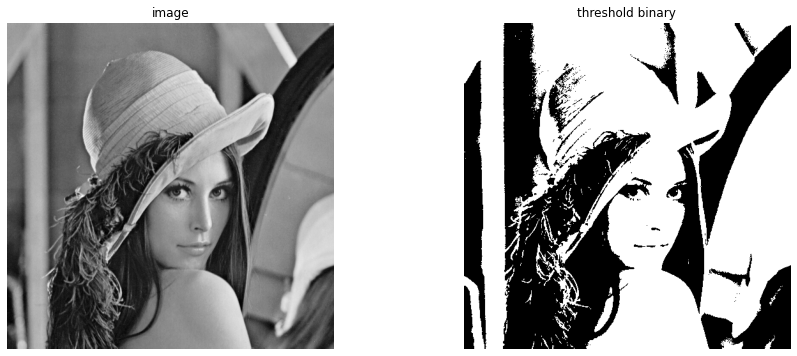

In [2]:
# Read the test image as grayscale and display it
image = cv2.imread('data/Lena.png', 0)
_, image_binary = cv2.threshold(image, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)



#####################################################
print_image('Original','image',image,495,505,405,436)
print_image('threshold binary','image',image_binary,495,505,405,436)
%pylab inline
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image],
                    ["threshold binary",image_binary]
                   ])
#print_image('mask','mask',np.where(mask > 0, np.uint8(255), np.uint8(0)), 0,1,0,512)
cv2.imshow('image, threshold', np.hstack([image,
                                          np.where(image_binary > 0, np.uint8(255), np.uint8(0))   
                                         ]))
cv2.waitKey()
cv2.destroyAllWindows()

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
------  Original-----------------    Shape(512, 512) image: uint8
[ 114 116 114 124 119 123 123 123 127 120 130 124 123 125 119 122 117 123 120 120 120 114 111 106 99 96 98 98 99 ]
[ 115 120 120 123 122 124 124 123 128 122 123 125 125 130 124 122 116 119 114 115 115 112 107 105 105 101 101 101 99 ]
[ 118 122 120 128 123 125 126 123 125 120 123 125 120 124 128 124 120 117 115 116 114 112 105 103 106 103 102 103 107 ]
[ 120 120 124 124 127 128 131 130 126 123 126 127 124 124 128 122 118 116 112 117 115 114 112 110 109 107 107 105 112 ]
[ 128 125 125 122 122 132 129 125 129 123 125 124 129 122 124 123 119 114 118 115 115 112 114 112 109 109 111 110 117 ]
[ 127 126 125 124 129 129 126 124 128 127 128 123 128 125 124 124 124 120 120 118 115 114 112 111 111 111 112 118 123 ]
[ 124 126 127 129 132 125 125 126 126 125 124 125 125 127 126 122 122 124 124 118 117 116 117 114 111 115 116 123 126 ]
[ 128 126 129 130 127 126 126 128 

<Figure size 1080x432 with 0 Axes>

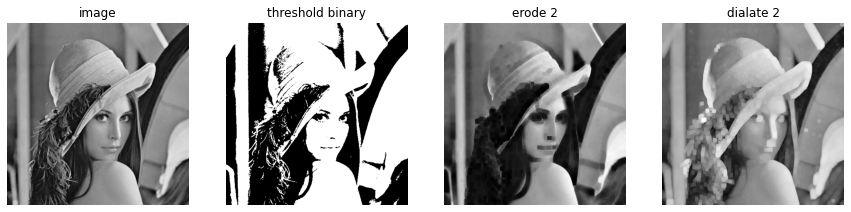

In [3]:
# Apply erosion and dilatation using a 5x5 kernel
kernel = np.ones((5,5),np.uint8)
print(kernel)

image_erosion = cv2.erode(image, kernel, iterations = 2)
image_dilation = cv2.dilate(image, kernel, iterations = 2)

image_erosion_10  = cv2.erode(image, kernel, iterations = 10)
image_dilation_10 = cv2.dilate(image, kernel, iterations = 10)



################################################################
print_image('Original','image',image,495,505,405,434)
print_image('threshold binary','image',image_binary,495,505,405,434)
print_image('Erode','erosion',image_erosion,495,505,405,434)
print_image('Dilate','dilation',image_dilation,495,505,405,434)

plt.figure(figsize=(15,6))
plt_view_image(plt,[["image",image],
                    ["threshold binary",image_binary],
                    ["erode 2",image_erosion],
                    ["dialate 2",image_dilation]
                   ])
#print_image('mask','mask',np.where(mask > 0, np.uint8(255), np.uint8(0)), 0,1,0,512)
cv2.imshow('threshold binary, erode, dialate', 
           np.hstack([np.where(image_binary > 0, np.uint8(255), np.uint8(0)),
                      image_erosion,
                      image_dilation
                     ]))
cv2.waitKey()
cv2.destroyAllWindows()

------  Erode 2------------------    Shape(512, 512) erosion: uint8
[ 101 101 101 101 101 105 105 107 107 110 110 110 110 110 110 110 111 111 105 103 99 96 93 90 90 84 84 84 84 ]
[ 105 105 105 105 105 105 111 111 111 111 111 111 111 111 111 111 112 112 105 103 99 96 93 90 90 84 84 84 84 ]
[ 105 105 105 106 106 106 114 115 115 115 115 115 115 114 112 112 112 112 105 103 99 96 95 90 90 90 90 90 90 ]
[ 106 106 106 106 106 106 114 117 118 118 118 118 116 114 112 112 112 112 105 103 99 96 95 93 93 93 93 93 93 ]
[ 107 107 110 112 114 114 114 119 119 120 119 119 116 114 112 112 112 112 105 103 99 96 96 96 96 96 96 96 96 ]
[ 110 110 110 115 115 120 120 120 120 120 120 120 116 114 112 112 112 112 105 103 103 101 101 101 99 99 99 99 99 ]
[ 115 115 117 117 118 120 120 120 120 120 120 120 118 114 112 112 112 112 105 103 103 103 102 102 102 102 102 102 102 ]
[ 116 116 119 119 120 120 122 122 122 122 122 122 118 114 112 112 112 112 112 110 109 107 107 105 105 105 105 105 105 ]
[ 116 116 120 120 120 

<Figure size 1080x432 with 0 Axes>

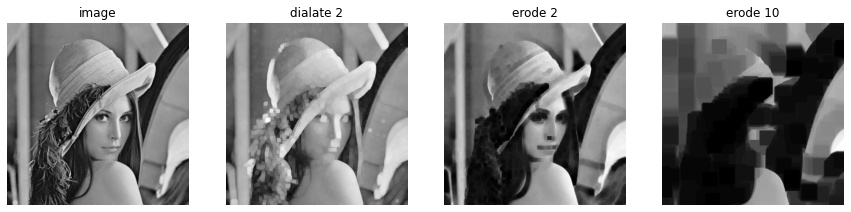

In [4]:
#image_erosion = cv2.erode(image, kernel, iterations = 2)
#image_dilation = cv2.dilate(image, kernel, iterations = 2)
#image_erosion_10  = cv2.erode(image, kernel, iterations = 10)
#image_dilation_10 = cv2.dilate(image, kernel, iterations = 10)

print_image('Erode 2','erosion',image_erosion,495,505,405,434)
print_image('Erode 10','erosion',image_erosion_10,495,505,405,434)
plt.figure(figsize=(15,6))
plt_view_image(plt,[["image",image],
                    ["dialate 2",image_dilation],
                    ["erode 2",image_erosion],
                    ["erode 10",image_erosion_10]
                   ])

------  Dilate 2-----------------    Shape(512, 512) dilation: uint8
[ 128 132 132 132 132 132 132 132 132 132 131 130 142 159 168 170 170 170 170 170 170 170 170 170 170 166 161 148 124 ]
[ 130 132 132 132 132 132 132 132 132 132 131 130 137 146 160 160 160 160 160 160 160 160 160 156 151 150 142 129 125 ]
[ 132 132 132 132 132 132 132 132 132 132 131 130 130 133 136 138 138 138 138 138 138 138 138 138 134 131 131 131 131 ]
[ 132 132 132 132 132 132 132 132 132 132 131 130 130 130 130 130 130 130 128 127 127 127 127 127 127 131 131 131 131 ]
[ 132 132 132 132 132 132 132 132 132 132 132 132 132 132 130 130 130 130 128 127 126 130 130 133 133 133 133 133 133 ]
[ 132 132 132 133 133 133 133 133 133 133 133 133 132 132 130 130 130 130 129 127 128 130 134 135 135 135 135 135 135 ]
[ 132 135 135 135 135 135 135 135 135 135 135 135 135 135 132 129 129 129 129 131 133 137 138 139 140 140 140 140 140 ]
[ 132 135 135 138 138 138 138 138 138 138 138 138 135 135 133 132 133 133 133 136 141 141 1

<Figure size 1080x432 with 0 Axes>

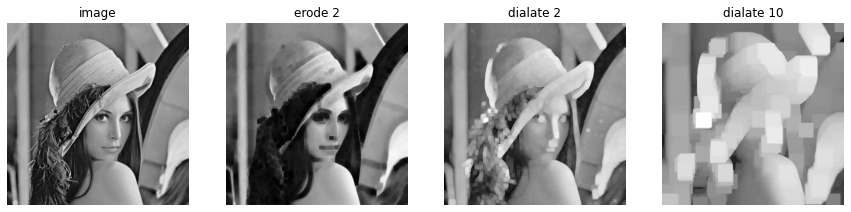

In [5]:
#image_erosion = cv2.erode(image, kernel, iterations = 2)
#image_dilation = cv2.dilate(image, kernel, iterations = 2)
#image_erosion_10  = cv2.erode(image, kernel, iterations = 10)
#image_dilation_10 = cv2.dilate(image, kernel, iterations = 10)

print_image('Dilate 2','dilation',image_dilation,495,505,405,434)
print_image('Dilate 10','dilation',image_dilation_10,495,505,405,434)
plt.figure(figsize=(15,6))
plt_view_image(plt,[["image",image],
                    ["erode 2",image_erosion],
                    ["dialate 2",image_dilation],
                    ["dialate 10",image_dilation_10]
                   ])

------  Original-----------------    Shape(512, 512) image: uint8
[ 114 116 114 124 119 123 123 123 127 120 130 124 123 125 119 122 117 123 120 120 120 114 111 106 99 96 98 98 99 ]
[ 115 120 120 123 122 124 124 123 128 122 123 125 125 130 124 122 116 119 114 115 115 112 107 105 105 101 101 101 99 ]
[ 118 122 120 128 123 125 126 123 125 120 123 125 120 124 128 124 120 117 115 116 114 112 105 103 106 103 102 103 107 ]
[ 120 120 124 124 127 128 131 130 126 123 126 127 124 124 128 122 118 116 112 117 115 114 112 110 109 107 107 105 112 ]
[ 128 125 125 122 122 132 129 125 129 123 125 124 129 122 124 123 119 114 118 115 115 112 114 112 109 109 111 110 117 ]
[ 127 126 125 124 129 129 126 124 128 127 128 123 128 125 124 124 124 120 120 118 115 114 112 111 111 111 112 118 123 ]
[ 124 126 127 129 132 125 125 126 126 125 124 125 125 127 126 122 122 124 124 118 117 116 117 114 111 115 116 123 126 ]
[ 128 126 129 130 127 126 126 128 127 127 124 127 125 125 124 126 120 126 119 119 120 117 118 115 11

<Figure size 720x432 with 0 Axes>

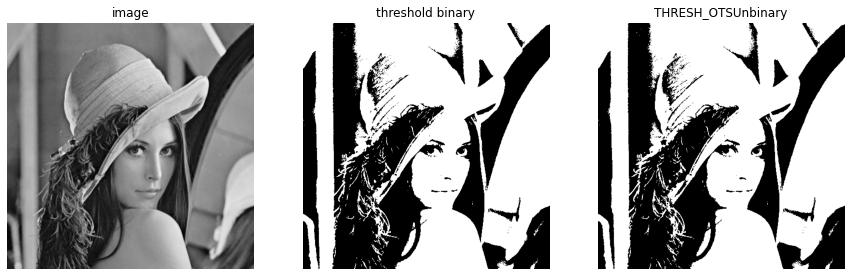

In [6]:
_, binary = cv2.threshold(image, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)



################################################################
print_image('Original','image',image,495,505,405,434)
print_image('threshold binary','image',image_binary,502,504,405,434)
print_image('THRESH_OTSUnbinary','image',binary,    502,504,405,434)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image],
                    ["threshold binary",image_binary],
                    ["THRESH_OTSUnbinary",binary]
                   ])
#print_image('mask','mask',np.where(mask > 0, np.uint8(255), np.uint8(0)), 0,1,0,512)
cv2.imshow('image, threshold, THRESH_OTSUnbinary', 
           np.hstack([image,
                      np.where(image_binary > 0, np.uint8(255), np.uint8(0)),
                      np.where(binary > 0, np.uint8(255), np.uint8(0))   
                     ]))
cv2.waitKey()
cv2.destroyAllWindows()

------  Erode 10-----------------    Shape(512, 512) erosion: uint8
[ 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 ]
[ 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 ]
[ 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 ]
[ 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 ]
[ 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 ]
[ 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 ]
[ 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 ]
[ 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 61 61 61 61 61 61 61 61 61 ]
[ 78 78 78 78 78 78 78 78 78 78 78 78 78 76 76 72 72 72 68 66 61 61 61 61 61 61 61 61 61 ]
[ 78 80 80 80 80 80 80 80 80 80 80 80 80 76 76 72 72 72 68 66 66 66 66 66 66 66 66 66 66 ]
------  MORPH_ERODE 10

<Figure size 1080x432 with 0 Axes>

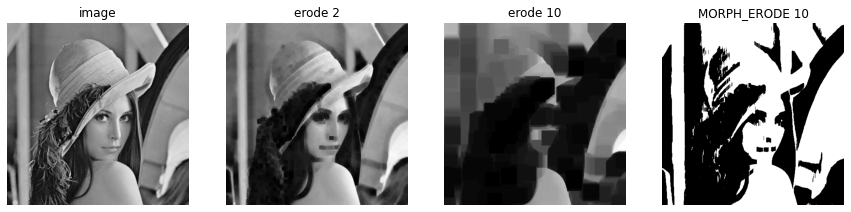

In [7]:
#image_erosion = cv2.erode(image, kernel, iterations = 2)
#image_dilation = cv2.dilate(image, kernel, iterations = 2)
#image_erosion_10  = cv2.erode(image, kernel, iterations = 10)
#image_dilation_10 = cv2.dilate(image, kernel, iterations = 10)

image_eroded_10 = cv2.morphologyEx(binary, cv2.MORPH_ERODE, (3, 3), iterations=10)
image_dilated_10 = cv2.morphologyEx(binary, cv2.MORPH_DILATE, (3, 3), iterations=10)


##################################################################
print_image('Erode 10','erosion',image_erosion_10,495,505,405,434)
print_image('MORPH_ERODE 10','erosion',image_eroded_10,495,505,405,434)

plt.figure(figsize=(15,6))
plt_view_image(plt,[["image",image],
                    ["erode 2",image_erosion],
                    ["erode 10",image_erosion_10],
                    ["MORPH_ERODE 10",image_eroded_10]
                   ])

------  Dilate 10----------------    Shape(512, 512) dilation: uint8
[ 214 216 216 216 216 216 216 216 216 216 216 216 216 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 ]
[ 214 216 216 216 216 216 216 216 216 216 216 216 216 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 218 ]
[ 214 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 ]
[ 214 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 ]
[ 214 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 ]
[ 214 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 ]
[ 214 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 ]
[ 214 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 2

<Figure size 1080x432 with 0 Axes>

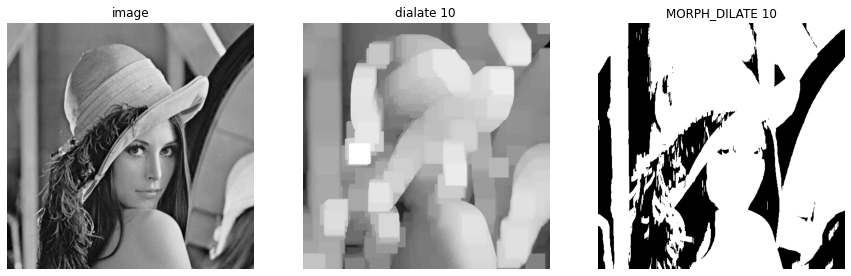

In [8]:
print_image('Dilate 10','dilation',image_dilation_10,495,505,405,434)
print_image('MORPH_DILATE 10','dilation',image_dilated_10,495,505,405,434)
plt.figure(figsize=(15,6))
plt_view_image(plt,[["image",image],
                    ["dialate 10",image_dilation_10],
                    ["MORPH_DILATE 10",image_dilated_10]
                   ])

------  MORPH_OPEN---------------    Shape(512, 512) image: uint8
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
------  MORPH_CLOSE--------------    Shape(512, 512) image: uint8
[ 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 ]
[ 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 ]
[ 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 ]
[ 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 ]


<Figure size 1080x576 with 0 Axes>

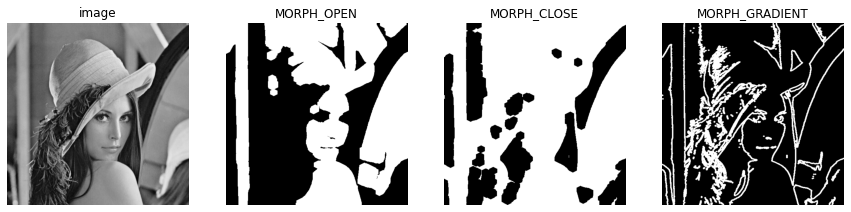

<Figure size 1080x432 with 0 Axes>

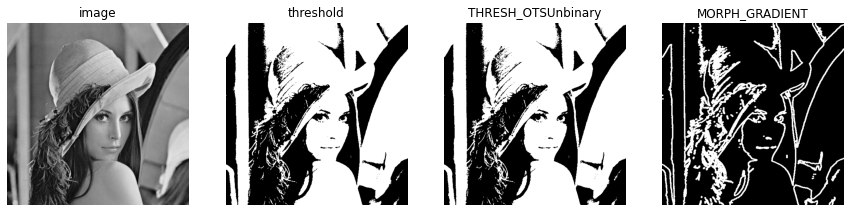

In [9]:
image_MORPH_OPEN = cv2.morphologyEx(binary, 
                                    cv2.MORPH_OPEN, 
                                    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)),  iterations=5)
image_MORPH_CLOSE= cv2.morphologyEx(binary, 
                                    cv2.MORPH_CLOSE, 
                                    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=5)
image_MORPH_GRADIENT = cv2.morphologyEx(binary, 
                                        cv2.MORPH_GRADIENT, 
                                        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

#################################################################
print_image('MORPH_OPEN','image',image_MORPH_OPEN,495,505,405,434)
print_image('MORPH_CLOSE','image',image_MORPH_CLOSE,495,505,405,434)
print_image('MORPH_GRADIENT','image',image_MORPH_GRADIENT,495,505,405,434)

plt.figure(figsize=(15,8))
plt_view_image(plt,[["image",image],
                    ["MORPH_OPEN",image_MORPH_OPEN],
                    ["MORPH_CLOSE",image_MORPH_CLOSE],
                    ["MORPH_GRADIENT",image_MORPH_GRADIENT]
                   ])
plt.figure(figsize=(15,6))
plt_view_image(plt,[["image",image],
                    ["threshold",image_binary],
                    ["THRESH_OTSUnbinary",binary],
                    ["MORPH_GRADIENT",image_MORPH_GRADIENT]
                   ])
cv2.imshow('threshold, THRESH_OTSUnbinary, MORPH_GRADIENT', 
           np.hstack([np.where(image_binary > 0, np.uint8(255), np.uint8(0)),
                      np.where(binary > 0, np.uint8(255), np.uint8(0)),
                      np.where(image_MORPH_GRADIENT > 0, np.uint8(255), np.uint8(0))
                     ]))
cv2.waitKey()
cv2.destroyAllWindows()